# This project involves the analysis of crime incident data reported in Los Angeles from 2020 to the present. 


In [ ]:
#1.)The dataset includes detailed records of each reported crime, such as the date and time of occurrence, location (including latitude and longitude), area, reporting district, crime category, and status of the report.
#2.)Crime data analytics is essential for identifying patterns, improving public safety, and assisting law enforcement in better resource allocation. 
#3.)With the increasing availability of public datasets, data-driven insights can help city planners and policymakers create safer communities.

In [ ]:
#🔍 Objectives & What I'm Going to Analyze
#1.)Identify crime hotspots using latitude and longitude data.

#2.) Detect outliers in numerical fields such as TIME OCC, LAT, LON, and Rpt Dist No using boxplots.

#3.) Analyze crime trends over time – by day, hour, or area.

#4.) Visualize the frequency of different crime types.

#5.) Compare areas or districts based on the number and type of crimes reported.

#5.) Map crimes geographically to visualize high-crime areas using heatmaps or scatter plots.

In [1]:
import pandas as pd
import numpy as np
# Loading  the dataset
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
df.head(10) # CHECKING THE DATASET......

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130
5,200209713,05/03/2020 12:00:00 AM,05/02/2020 12:00:00 AM,1800,2,Rampart,245,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 W 4TH ST,NaN,34.0642,-118.2771
6,200200759,07/07/2020 12:00:00 AM,07/07/2020 12:00:00 AM,1340,2,Rampart,265,1,648,ARSON,...,IC,Invest Cont,648.0,998.0,NaN,NaN,JAMES M WOOD,ALVARADO,34.0536,-118.2788
7,201308739,03/27/2020 12:00:00 AM,03/27/2020 12:00:00 AM,1210,13,Newton,1333,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,3200 S SAN PEDRO ST,NaN,34.0170,-118.2643
8,201112065,07/31/2020 12:00:00 AM,07/30/2020 12:00:00 AM,2030,11,Northeast,1161,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,NaN,NaN,NaN,KENMORE ST,FOUNTAIN,34.0953,-118.2974
9,200121929,12/04/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2300,1,Central,105,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,400 SOLANO AV,NaN,34.0710,-118.2302


In [2]:
#Explaination of the column names..
#DR_NO → Report Number: A unique identifier for the crime report.

#Date Rptd → Date Reported: The date when the crime was reported to the authorities.

#DATE OCC → Date Occurred: The date when the crime actually occurred.

#TIME OCC → Time Occurred: The time at which the crime took place.

#AREA → Area Code: A numerical code representing the geographic area where the crime occurred.

#AREA NAME → Area Name: The name of the geographic area where the crime occurred.

#Rpt Dist No → Reporting District Number: A smaller subdivision within the area for more localized reporting.

#Part 1-2 → Crime Category: Indicates whether the crime is a Part 1 (serious) or Part 2 (less serious) offense.

#Crm Cd → Crime Code: A numerical code categorizing the type of crime.

#Crm Cd Desc → Crime Description: A textual description of the crime committed.

#Mocodes → Modus Operandi Codes: Codes describing the method or pattern used in the crime.

#Vict Age → Victim Age: The age of the victim.

#Vict Sex → Victim Sex: The gender of the victim (M for male, F for female, etc.).

#Vict Descent → Victim Ethnicity: The ethnic or racial background of the victim.
#Premis Cd → Premises Code: A numerical code representing the type of location where the crime occurred.

#Premis Desc → Premises Description: A textual description of the type of location (e.g., "Street," "Residence").

#Weapon Used Cd → Weapon Code: A numerical code indicating the type of weapon used in the crime.

#Weapon Desc → Weapon Description: A textual description of the weapon used (e.g., "Handgun," "Knife").

#Status → Crime Status Code: A code indicating the current status of the case.

#Status Desc → Crime Status Description: A textual description of the case status (e.g., "Investigation Ongoing," "Arrest Made").

#Crm Cd 1 → Additional Crime Code 1: An additional crime classification if multiple crimes were committed.

#Crm Cd 2 → Additional Crime Code 2: Another possible crime classification.

#Crm Cd 3 → Additional Crime Code 3: Another possible crime classification.

#Crm Cd 4 → Additional Crime Code 4: Another possible crime classification.

#LOCATION → Incident Location: The address or general location where the crime occurred.

#Cross Street → Nearest Cross Street: The nearest intersecting street to the incident location.

#LAT → Latitude: The latitude coordinate of the crime location.

#LON → Longitude: The longitude coordinate of the crime location.


In [3]:
#PERFORMING DATA CLEANING AND EDA (EXPLORATORY DATA ANALYSIS)
# -> . Data Cleaning Tasks
# 1.)Drop unnecessary columns: Removing irrelevant columns like DR_NO, Mocodes, Crm Cd 1-4, Rpt Dist No, Weapon Used Cd, Premis Cd,  Status and Vict Descent to streamline analysis.

# 2.) Handle missing values: Checking for missing data and applied appropriate strategies—either filling missing values (e.g., mean/median for numerical data) or dropping rows with excessive missing data.

# 3.) Convert date and time columns: Transforming Date Rptd, DATE OCC, and TIME OCC into proper datetime format for accurate time-based analysis.

# 4.) Ensure location data is numeric: Verifying LAT (latitude) and LON (longitude) are correctly formatted as numeric values to facilitate geospatial analysis.

# 5.) Giving relevent names to the columns for easy understanding

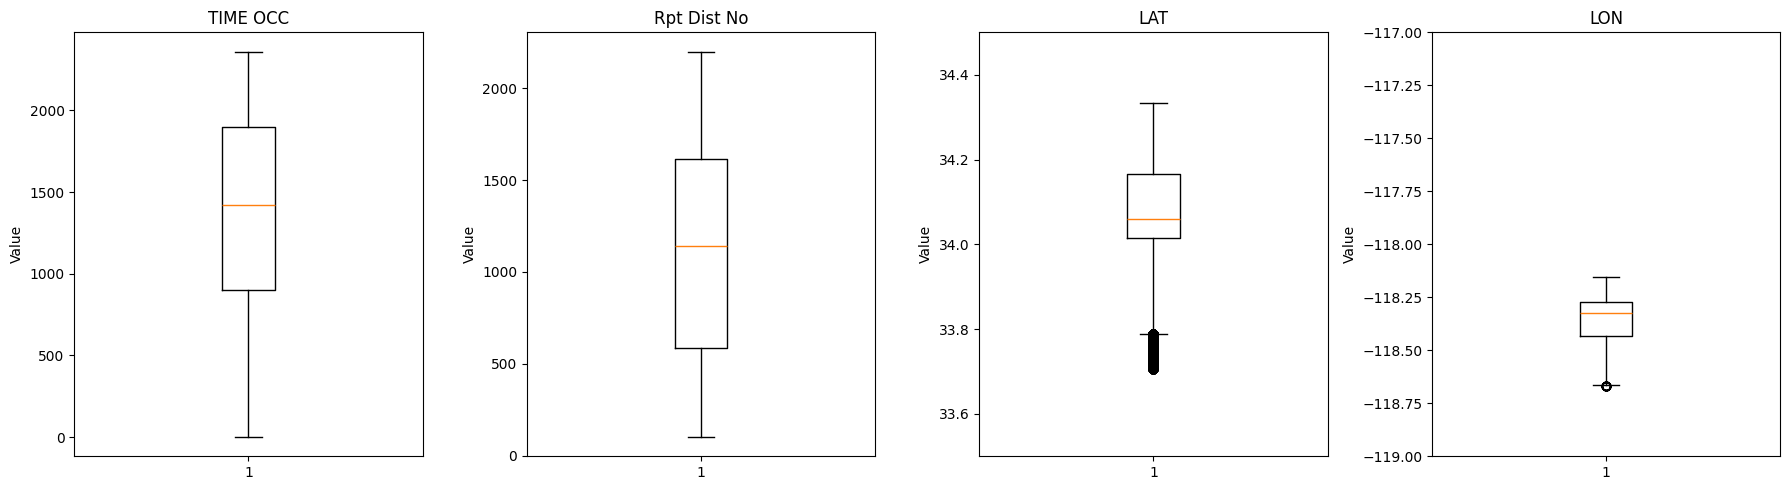

In [6]:
# DETECTION OF OUTLIERS IN A DATASET
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# Drop rows with missing LAT or LON
data = data.dropna(subset=['LAT', 'LON', 'TIME OCC', 'Rpt Dist No'])

# Columns selected for boxplots
columns = ['TIME OCC', 'Rpt Dist No', 'LAT', 'LON']

# Plotting
plt.figure(figsize=(18, 5))

for i, col in enumerate(columns):
    plt.subplot(1, len(columns), i + 1)
    plt.boxplot(data[col], vert=True, showfliers=True)
    plt.title(col)
    plt.ylabel("Value")

    # Adjust for LAT and LON to show outliers more clearly
    if col == 'LAT':
        plt.ylim(33.5, 34.5)
    elif col == 'LON':
        plt.ylim(-119, -117)

plt.tight_layout()
plt.show()


In [ ]:
#Conclusion from the following BOX-PLOT
#1.) Distribution Range: Each box plot displays the range of values for different variables, indicating the minimum and maximum values.
#2.)Interquartile Range: The boxes represent the interquartile range (IQR), showing where the middle 50% of the data falls for each variable.
#3.) Median Values: The line inside each box indicates the median value, providing a central tendency measure for each variable.
#4.) Outliers: Some plots (like LAT) have outliers, indicated by points outside the whiskers, which may require further investigation.
#5.) Variable Comparisons: The scale and spread of each variable differ, suggesting varying levels of dispersion and potential significance in the dataset being analyzed.


In [5]:
# STEP 1:  Droping unnecessary columns
# List of columns to drop
columns_to_drop = ["DR_NO", "Mocodes", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4", 
                   "Rpt Dist No", "Weapon Used Cd", "Premis Cd", "Status", "Vict Descent"]

# Drop columns permanently
df.drop(columns=columns_to_drop, inplace=True) # True because deleteing the cols permanently...

# Display the cleaned dataframe
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005149 entries, 0 to 1005148
Data columns (total 17 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Date Rptd     1005149 non-null  object 
 1   DATE OCC      1005149 non-null  object 
 2   TIME OCC      1005149 non-null  int64  
 3   AREA          1005149 non-null  int64  
 4   AREA NAME     1005149 non-null  object 
 5   Part 1-2      1005149 non-null  int64  
 6   Crm Cd        1005149 non-null  int64  
 7   Crm Cd Desc   1005149 non-null  object 
 8   Vict Age      1005149 non-null  int64  
 9   Vict Sex      860384 non-null   object 
 10  Premis Desc   1004561 non-null  object 
 11  Weapon Desc   327264 non-null   object 
 12  Status Desc   1005149 non-null  object 
 13  LOCATION      1005149 non-null  object 
 14  Cross Street  154240 non-null   object 
 15  LAT           1005149 non-null  float64
 16  LON           1005149 non-null  float64
dtypes: float64(2), int64(5), ob

In [7]:
# Handling missing values

# Drop rows where essential columns have too many missing values
df.dropna(thresh=df.shape[1] * 0.7, inplace=True)  # Keeps rows with at least 70% non-null values

# Fill missing values for numerical columns with median
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values for categorical columns with the most frequent value (mode)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Display dataset info after handling missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005149 entries, 0 to 1005148
Data columns (total 17 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Date Rptd     1005149 non-null  object 
 1   DATE OCC      1005149 non-null  object 
 2   TIME OCC      1005149 non-null  int64  
 3   AREA          1005149 non-null  int64  
 4   AREA NAME     1005149 non-null  object 
 5   Part 1-2      1005149 non-null  int64  
 6   Crm Cd        1005149 non-null  int64  
 7   Crm Cd Desc   1005149 non-null  object 
 8   Vict Age      1005149 non-null  int64  
 9   Vict Sex      1005149 non-null  object 
 10  Premis Desc   1005149 non-null  object 
 11  Weapon Desc   1005149 non-null  object 
 12  Status Desc   1005149 non-null  object 
 13  LOCATION      1005149 non-null  object 
 14  Cross Street  1005149 non-null  object 
 15  LAT           1005149 non-null  float64
 16  LON           1005149 non-null  float64
dtypes: float64(2), int64(5), ob

In [ ]:
#Explaination of the code above
#df.dropna(thresh=df.shape[1] * 0.7, inplace=True)
#df.shape[1] gives the total number of columns in the dataset.
#thresh=df.shape[1] * 0.7 ensures that only rows with at least 70% non-null values are kept.
#dropna() removes rows that have too many missing values, preventing unreliable data.

#numeric_cols = df.select_dtypes(include=['number']).columns
#df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
#select_dtypes(include=['number']) selects only numerical columns.

#.median() is used instead of the mean because the median is less affected by extreme values (outliers).

#Missing values in numerical columns are replaced with the median of each column.

#categorical_cols = df.select_dtypes(include=['object']).columns
#df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

#select_dtypes(include=['object']) selects categorical (text-based) columns.

#.mode() finds the most frequently occurring value in each categorical column.

#.iloc[0] ensures that only the first mode value is used to fill missing entries.

#This prevents issues with missing category labels and maintains consistency.



In [ ]:
df.head()

In [8]:
# Convert 'Date Rptd' and 'DATE OCC' into datetime format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

# Convert 'TIME OCC' to a proper time format
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)  # Ensure 4-digit format
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H%M', errors='coerce').dt.time

# Combine 'DATE OCC' and 'TIME OCC' into a single datetime column
df['DATETIME OCC'] = pd.to_datetime(df['DATE OCC'].astype(str) + ' ' + df['TIME OCC'].astype(str), errors='coerce')

# Drop the original 'DATE OCC' and 'TIME OCC' columns
df.drop(columns=['DATE OCC', 'TIME OCC'], inplace=True)

# Display first few rows
df.head()



C:\Users\DELL\AppData\Local\Temp\ipykernel_6080\3403682880.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_6080\3403682880.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')


,Date Rptd,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,Weapon Desc,Status Desc,LOCATION,Cross Street,LAT,LON,DATETIME OCC
0,2020-03-01,7,Wilshire,1,510,VEHICLE - STOLEN,0,M,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,1900 S LONGWOOD AV,BROADWAY,34.0375,-118.3506,2020-03-01 21:30:00
1,2020-02-09,1,Central,1,330,BURGLARY FROM VEHICLE,47,M,BUS STOP/LAYOVER (ALSO QUERY 124),"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1000 S FLOWER ST,BROADWAY,34.0444,-118.2628,2020-02-08 18:00:00
2,2020-11-11,3,Southwest,1,480,BIKE - STOLEN,19,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1400 W 37TH ST,BROADWAY,34.0210,-118.3002,2020-11-04 17:00:00
3,2023-05-10,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,CLOTHING STORE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,14000 RIVERSIDE DR,BROADWAY,34.1576,-118.4387,2020-03-10 20:37:00
4,2020-09-09,4,Hollenbeck,1,510,VEHICLE - STOLEN,0,M,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,200 E AVENUE 28,BROADWAY,34.0820,-118.2130,2020-09-09 06:30:00


In [53]:
#Steps for Converting Date and Time Columns
#Convert 'Date Rptd' and 'DATE OCC' to datetime format

#Used pd.to_datetime() to convert them into proper date format.

#Set errors='coerce' to handle any invalid values gracefully.

#️ Ensure 'TIME OCC' is in the correct format

#Converted it to a string and ensured it has 4 digits using .str.zfill(4).

#Used pd.to_datetime() to convert it into a proper time format.

️#Combine 'DATE OCC' and 'TIME OCC' into a single datetime column ('DATETIME OCC')

#Merged both columns to create a new column with both date and time together.

#Used pd.to_datetime() again to ensure correct formatting.

️#Drop the original 'DATE OCC' and 'TIME OCC' columns

#Removed them to keep the dataset clean and avoid redundancy.

SyntaxError: invalid character '️' (U+FE0F) (2302446432.py, line 14)

In [54]:
# Converting LAT and LON to numeric, coercing errors to NaN
df['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')
df['LON'] = pd.to_numeric(df['LON'], errors='coerce')

# Handling missing values (drop rows where LAT or LON is NaN)
df = df.dropna(subset=['LAT', 'LON'])

# Verifying the data types
print(df[['LAT', 'LON']].dtypes)


LAT    float64
LON    float64
dtype: object


In [55]:
#Giving relevent names to the cols for better understanding
# Rename columns for better readability
df.rename(columns={
    "Date Rptd": "Reported_Date",
    "DATE OCC": "Occurred_Date",
    "TIME OCC": "Occurred_Time",
    "AREA": "Area_Code",
    "AREA NAME": "Area_Name",
    "Part 1-2": "Crime_Seriousness",
    "Crm Cd": "Crime_Code",
    "Crm Cd Desc": "Crime_Description",
    "Vict Age": "Victim_Age",
    "Vict Sex": "Victim_Sex",
    "Premis Desc": "Premises_Description",
    "Weapon Desc": "Weapon_Used",
    "Status Desc": "Case_Status",
    "LOCATION": "Incident_Location",
    "Cross Street": "Nearest_Cross_Street",
    "LAT": "Latitude",
    "LON": "Longitude"
}, inplace=True)

# Display updated column names
df.head()


,Reported_Date,Area_Code,Area_Name,Crime_Seriousness,Crime_Code,Crime_Description,Victim_Age,Victim_Sex,Premises_Description,Weapon_Used,Case_Status,Incident_Location,Nearest_Cross_Street,Latitude,Longitude,DATETIME OCC
0,2020-03-01,7,Wilshire,1,510,VEHICLE - STOLEN,0,M,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,1900 S LONGWOOD AV,BROADWAY,34.0375,-118.3506,2020-03-01 21:30:00
1,2020-02-09,1,Central,1,330,BURGLARY FROM VEHICLE,47,M,BUS STOP/LAYOVER (ALSO QUERY 124),"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1000 S FLOWER ST,BROADWAY,34.0444,-118.2628,2020-02-08 18:00:00
2,2020-11-11,3,Southwest,1,480,BIKE - STOLEN,19,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1400 W 37TH ST,BROADWAY,34.0210,-118.3002,2020-11-04 17:00:00
3,2023-05-10,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,CLOTHING STORE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,14000 RIVERSIDE DR,BROADWAY,34.1576,-118.4387,2020-03-10 20:37:00
4,2020-09-09,4,Hollenbeck,1,510,VEHICLE - STOLEN,0,M,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,200 E AVENUE 28,BROADWAY,34.0820,-118.2130,2020-09-09 06:30:00


In [56]:
# Exploratory Data Analysis (EDA)
# Basic information about the dataset
print(df.info())

# Display first few rows
print(df.head())

# Summary statistics for numerical columns
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005149 entries, 0 to 1005148
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Reported_Date         1005149 non-null  datetime64[ns]
 1   Area_Code             1005149 non-null  int64         
 2   Area_Name             1005149 non-null  object        
 3   Crime_Seriousness     1005149 non-null  int64         
 4   Crime_Code            1005149 non-null  int64         
 5   Crime_Description     1005149 non-null  object        
 6   Victim_Age            1005149 non-null  int64         
 7   Victim_Sex            1005149 non-null  object        
 8   Premises_Description  1005149 non-null  object        
 9   Weapon_Used           1005149 non-null  object        
 10  Case_Status           1005149 non-null  object        
 11  Incident_Location     1005149 non-null  object        
 12  Nearest_Cross_Street  1005149 non-null  ob

In [57]:


# Now you can check for missing values
print(df.isnull().sum())

# Drop and fill missing values
df.dropna(subset=['Crime_Description', 'Victim_Age'], inplace=True)  # Droping the rows where these columns are missing
df['Victim_Age'].fillna(df['Victim_Age'].median(), inplace=True)  # Filling missing ages with median value
df['Weapon_Used'].fillna("Unknown", inplace=True)  # Fill missing weapon descriptions with "Unknown"

# Display first few rows
print(df.head())


Reported_Date           0
Area_Code               0
Area_Name               0
Crime_Seriousness       0
Crime_Code              0
Crime_Description       0
Victim_Age              0
Victim_Sex              0
Premises_Description    0
Weapon_Used             0
Case_Status             0
Incident_Location       0
Nearest_Cross_Street    0
Latitude                0
Longitude               0
DATETIME OCC            0
dtype: int64
  Reported_Date  Area_Code   Area_Name  Crime_Seriousness  Crime_Code  \
0    2020-03-01          7    Wilshire                  1         510   
1    2020-02-09          1     Central                  1         330   
2    2020-11-11          3   Southwest                  1         480   
3    2023-05-10          9    Van Nuys                  1         343   
4    2020-09-09          4  Hollenbeck                  1         510   

                          Crime_Description  Victim_Age Victim_Sex  \
0                          VEHICLE - STOLEN           0       

C:\Users\DELL\AppData\Local\Temp\ipykernel_16872\2579007845.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Victim_Age'].fillna(df['Victim_Age'].median(), inplace=True)  # Filling missing ages with median value
C:\Users\DELL\AppData\Local\Temp\ipykernel_16872\2579007845.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

In [81]:
df.head(100)

,Reported_Date,Area_Code,Area_Name,Crime_Seriousness,Crime_Code,Crime_Description,Victim_Age,Victim_Sex,Premises_Description,Weapon_Used,Case_Status,Incident_Location,Nearest_Cross_Street,Latitude,Longitude,DATETIME OCC,Year,Hour
0,2020-03-01,7,Wilshire,1,510,VEHICLE - STOLEN,0,M,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,1900 S LONGWOOD AV,BROADWAY,34.0375,-118.3506,2020-03-01 21:30:00,2020,21
1,2020-02-09,1,Central,1,330,BURGLARY FROM VEHICLE,47,M,BUS STOP/LAYOVER (ALSO QUERY 124),"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1000 S FLOWER ST,BROADWAY,34.0444,-118.2628,2020-02-08 18:00:00,2020,18
2,2020-11-11,3,Southwest,1,480,BIKE - STOLEN,19,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1400 W 37TH ST,BROADWAY,34.0210,-118.3002,2020-11-04 17:00:00,2020,17
3,2023-05-10,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,CLOTHING STORE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,14000 RIVERSIDE DR,BROADWAY,34.1576,-118.4387,2020-03-10 20:37:00,2023,20
4,2020-09-09,4,Hollenbeck,1,510,VEHICLE - STOLEN,0,M,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,200 E AVENUE 28,BROADWAY,34.0820,-118.2130,2020-09-09 06:30:00,2020,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-10-24,1,Central,2,354,THEFT OF IDENTITY,49,M,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,200 E 1ST ST,BROADWAY,34.0512,-118.2419,2020-10-24 06:45:00,2020,6
96,2020-09-23,8,West LA,1,510,VEHICLE - STOLEN,0,M,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,10200 CRESTA DR,BROADWAY,34.0417,-118.4041,2020-09-23 11:00:00,2020,11
97,2020-09-04,3,Southwest,1,330,BURGLARY FROM VEHICLE,38,M,GARAGE/CARPORT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,5100 CRENSHAW BL,BROADWAY,33.9967,-118.3306,2020-09-03 09:00:00,2020,9
98,2020-06-16,9,Van Nuys,1,330,BURGLARY FROM VEHICLE,37,M,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,14200 LEADWELL ST,BROADWAY,34.2041,-118.4425,2020-06-15 23:00:00,2020,23


In [82]:
#Exploratory Data Analysis 
# Now as the data cleaning is done , our next step is Exploratory Data Analysis  . 


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005149 entries, 0 to 1005148
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Reported_Date         1005149 non-null  datetime64[ns]
 1   Area_Code             1005149 non-null  int64         
 2   Area_Name             1005149 non-null  object        
 3   Crime_Seriousness     1005149 non-null  int64         
 4   Crime_Code            1005149 non-null  int64         
 5   Crime_Description     1005149 non-null  object        
 6   Victim_Age            1005149 non-null  int64         
 7   Victim_Sex            1005149 non-null  object        
 8   Premises_Description  1005149 non-null  object        
 9   Weapon_Used           1005149 non-null  object        
 10  Case_Status           1005149 non-null  object        
 11  Incident_Location     1005149 non-null  object        
 12  Nearest_Cross_Street  1005149 non-null  ob

In [84]:
df.describe()

,Reported_Date,Area_Code,Crime_Seriousness,Crime_Code,Victim_Age,Latitude,Longitude,DATETIME OCC,Year,Hour
count,1005149,1.005149e+06,1.005149e+06,1.005149e+06,1.005149e+06,1.005149e+06,1.005149e+06,1005149,1.005149e+06,1.005149e+06
mean,2022-05-26 01:40:42.203891456,1.069108e+01,1.400290e+00,5.001465e+02,2.891334e+01,3.399820e+01,-1.180909e+02,2022-05-14 11:11:28.957557504,2.021911e+03,1.322096e+01
min,2020-01-01 00:00:00,1.000000e+00,1.000000e+00,1.100000e+02,-4.000000e+00,0.000000e+00,-1.186676e+02,2020-01-01 00:01:00,2.020000e+03,0.000000e+00
25%,2021-04-21 00:00:00,5.000000e+00,1.000000e+00,3.310000e+02,0.000000e+00,3.401470e+01,-1.184305e+02,2021-04-06 11:15:00,2.021000e+03,9.000000e+00
50%,2022-06-08 00:00:00,1.100000e+01,1.000000e+00,4.420000e+02,3.000000e+01,3.405890e+01,-1.183225e+02,2022-05-26 13:50:00,2.022000e+03,1.400000e+01
75%,2023-07-04 00:00:00,1.600000e+01,2.000000e+00,6.260000e+02,4.400000e+01,3.416490e+01,-1.182739e+02,2023-06-22 13:30:00,2.023000e+03,1.900000e+01
max,2025-03-13 00:00:00,2.100000e+01,2.000000e+00,9.560000e+02,1.200000e+02,3.433430e+01,0.000000e+00,2025-03-13 17:57:00,2.025000e+03,2.300000e+01
std,NaN,6.110401e+00,4.899573e-01,2.052626e+02,2.199376e+01,1.610587e+00,5.581948e+00,NaN,1.317683e+00,6.510201e+00


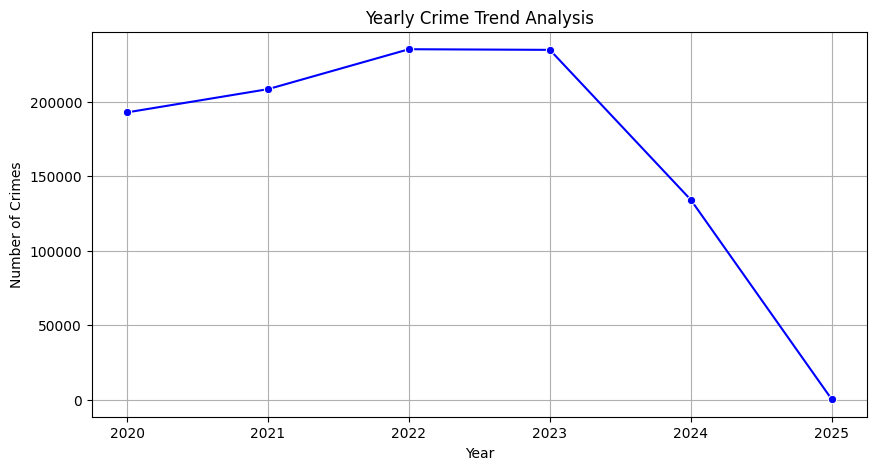

In [85]:
# Yearly crime trend analysis


import matplotlib.pyplot as plt
import seaborn as sns


# Convert 'Reported_Date' to datetime format
df['Reported_Date'] = pd.to_datetime(df['Reported_Date'])

# When df['Reported_Date'] is a datetime column (dtype='datetime64[ns]'), 
#.dt allows access to its datetime properties.
#.dt.year extracts the year from each date in the column.

df['Year'] = df['Reported_Date'].dt.year

# Group by year and count occurrences
yearly_trend = df['Year'].value_counts().sort_index()

# Plot the yearly crime trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o", color="b")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Yearly Crime Trend Analysis")
plt.grid(True)
plt.show()


In [86]:
# The insight that we are getting from this is as follows:
# 1.) 2020-2022: The number of crimes appears to have a slight upward trend, indicating an increase in crime during these years.
# 2.) 2023: There's a noticeable peak, suggesting that the number of crimes reached a maximum in this year.
# 3.) 2024-2025: A significant and sharp decline in the number of crimes is depicted, suggesting a substantial decrease in criminal activity.

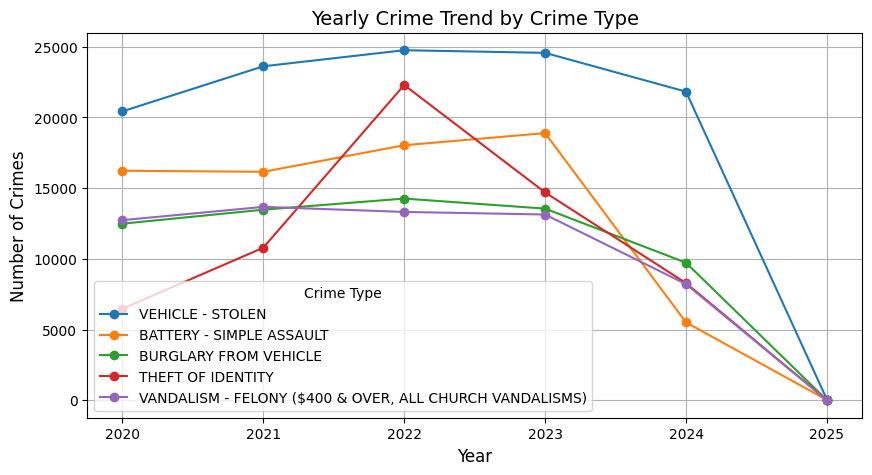

In [87]:
#Yearly Crime Trend Analysis by Crime Type

# Converting 'Reported_Date' to datetime format
df['Reported_Date'] = pd.to_datetime(df['Reported_Date'])

# Extracting the year from the date
df['Year'] = df['Reported_Date'].dt.year

# Counting the number of crimes per year for each crime type
crime_trend = df.groupby(['Year', 'Crime_Description']).size().unstack(fill_value=0)

# Selecting the Top 5 most frequent crime types
top_crimes = df['Crime_Description'].value_counts().head(5).index



plt.figure(figsize=(10, 5))

for crime in top_crimes:
    plt.plot(crime_trend.index, crime_trend[crime], marker="o", linestyle="-", label=crime)


plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.title("Yearly Crime Trend by Crime Type", fontsize=14)
plt.legend(title="Crime Type")
plt.grid(True)


plt.show()




In [88]:
# The insight that we are getting from this is as follows:
# 1.) Overall Crime Fluctuations: There was a notable spike in crime around 2022, particularly with Vehicle Theft.
# 2.) Trends by Crime Type: 
#Vehicle Theft (Stolen): This had the highest number of reported crimes and shows a steady increase until 2022, followed by a decline.
#Battery (Simple Assault): It shows a relatively consistent trend, with a slight decrease toward 2025.
#Burglary from Vehicle: There is a gradual increase until 2022, followed by a decrease.
#Theft of Identity: This category appears more stable, with minor fluctuations.
#Vandalism: This crime type shows an increase up to 2022 but is on a downward trend afterward.
# 3.) Recent Trends (2023-2025): A decline in most crime types after the peak in 2022 indicates potential improvements in crime prevention or reporting practices.
# 4.) Interrelation of Crime Types: The trends suggest certain crime types may influence others, with the sharp increase in vehicle theft possibly correlating with trends in burglary or vandalism.

<Axes: title={'center': 'Top 5 Most Reported Crimes'}, ylabel='Crime_Description'>

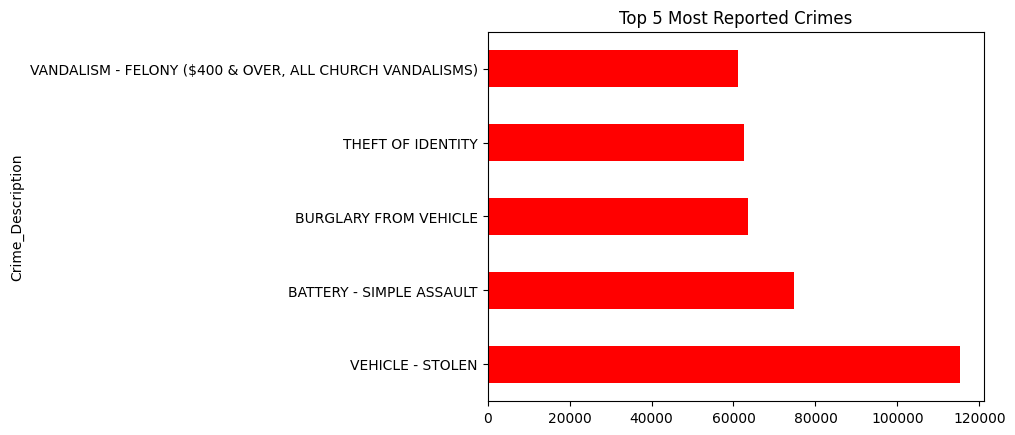

In [89]:
# What are the top 5 most reported crimes?

df['Crime_Description'].value_counts().head(5).plot(kind='barh', title='Top 5 Most Reported Crimes',color='red')


In [90]:
# Data insisghts that we are getting from this are as follows:
# 1.) Vandalism as the Most Reported Crime: It significantly exceeds the others in frequency, indicating it might be a widespread issue in the area.
# 2.) Theft of Identity: This crime appears to be the second most common, pointing to concerns about cybersecurity and personal security.
# 3.) Burglary from Vehicle: This signifies issues with vehicle security and suggests it as an area of concern for law enforcement and community safety.
# 4.) Battery - Simple Assault: Although lower in frequency compared to the top three, it still highlights a notable level of violent crime.
# 5.) Vehicle Theft: This tends to be a major concern in urban areas, indicating the need for enhanced vehicle security measures.


<Axes: title={'center': 'Crime Distribution by Area'}, xlabel='Area_Name'>

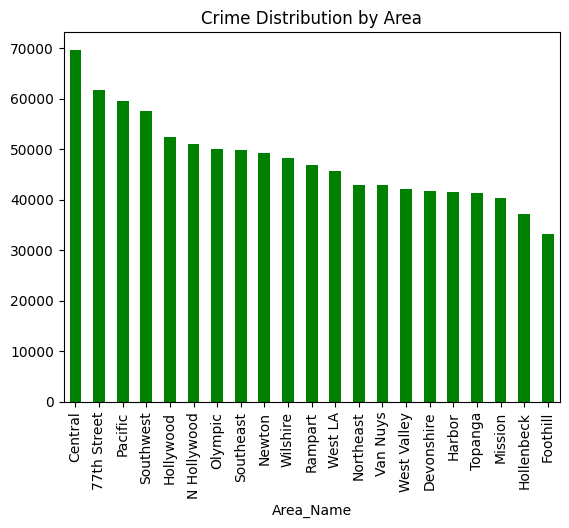

In [91]:
# Which areas report the most crimes?
df['Area_Name'].value_counts().plot(kind='bar', title='Crime Distribution by Area',color='Green')


In [92]:
#Data insisghts that we are getting from this ara as follows:
# 1.) Central Concentration of Crime: The Central area has the highest crime distribution, significantly surpassing other areas with nearly 70,000 incidents. 
#This suggests it may be a key focus for crime prevention and law enforcement efforts.
# 2.) High Crime Areas: Areas like 77th Street, Pacific, and Southwest also exhibit high crime levels (over 60,000), 
#indicating that these regions may face similar issues as Central.
# 3.) Moderate Crime Areas: As we move down the list, areas like Southeast, Newton, and Wilshire show a moderate level of crime (around 40,000 to 50,000 incidents). 
#These may require targeted resources but are not as critical as the top areas.
# 4.) Lower Crime Areas: Hollenbeck, Foothill, and a few others have relatively low crime figures, 
#suggesting they may be safer or have effective crime management strategies in place.
# 5.)  Strategic Planning: The data can guide resource allocation for police presence, community programs, and intervention strategies, 
#aiming to reduce crime in the highest impacted areas while maintaining safety in lower-crime zones.

Text(0.5, 1.0, 'Victim Age Distribution')

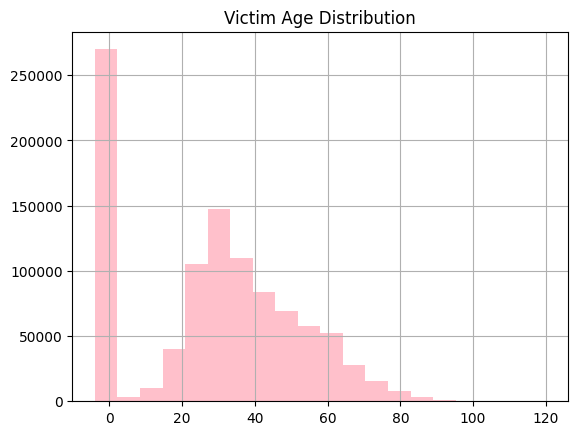

In [93]:
# What is the distribution of victim ages?
df['Victim_Age'].hist(bins=20 , color='pink')
plt.title("Victim Age Distribution")


In [94]:
#Data insisghts that we are getting from this ara as follows:
#Majority of Victims Young: A peak at age 0 indicates many infant victims.
#Fewer Older Victims: Very low counts for ages 60 and above.
#Left-Skewed Distribution: More victims are younger, especially in early adulthood.

<Axes: title={'center': 'Crime Seriousness Levels'}, ylabel='count'>

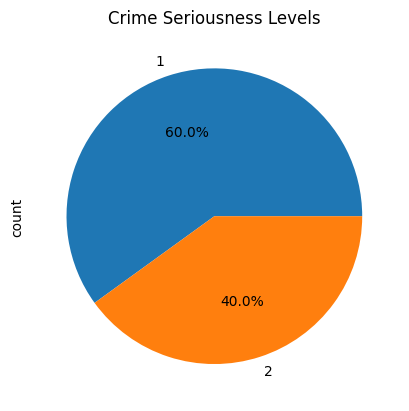

In [95]:
# What is the proportion of different seriousness levels?
df['Crime_Seriousness'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Crime Seriousness Levels')


In [96]:
#Data insisghts that we are getting from this ara as follows:
#Level 1: Represents 60% of the total incidents, indicating a lower seriousness level of crime.
#Level 2: Accounts for 40%, indicating a higher seriousness level of crime.
#The majority of crimes (60%) are classified as less serious (Level 1).
#A significant portion (40%) is categorized as more serious (Level 2).

<Axes: title={'center': 'Crime Occurrence by Hour'}, xlabel='Hour'>

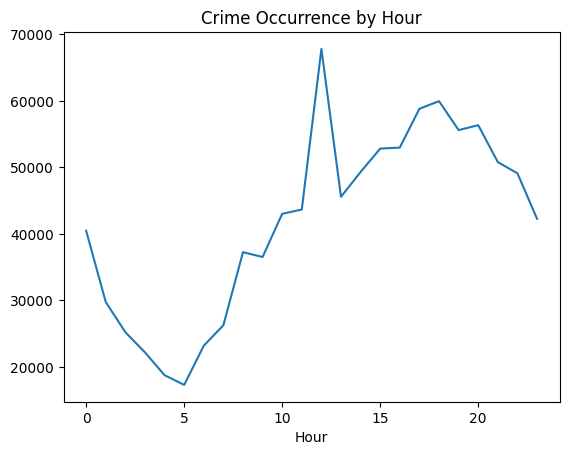

In [97]:
# At what time do most crimes occur?
df['Hour'] = pd.to_datetime(df['DATETIME OCC']).dt.hour
df['Hour'].value_counts().sort_index().plot(kind='line', title='Crime Occurrence by Hour')


In [98]:
#Data insisghts that we are getting from this ara as follows:
#Peak Times: Crime is highest in the late afternoon and early evening (around 5 PM to 7 PM).
#Lowest Times: Early morning hours (midnight to 5 AM) have the least crime.
#Trend: Crime rates drop after the evening peak but are still higher than in the early morning.

<Axes: title={'center': 'Victim Gender Distribution'}, xlabel='Victim_Sex'>

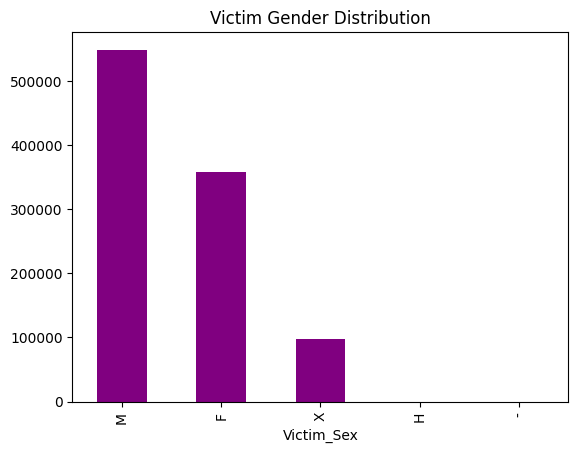

In [99]:
# What is the gender distribution of victims?
df['Victim_Sex'].value_counts().plot(kind='bar', title='Victim Gender Distribution',color='purple')


In [100]:
#Data insisghts that we are getting from this ara as follows:
#Male Victims: Over 500,000 (dominates the data).
#Female Victims: Approximately 400,000 (significantly fewer).
#Other Genders: Very low numbers for non-binary (denoted by 'X', 'I', etc.).
#Insight: Clear disparity in victimization rates, with males being the most affected group.

<Axes: title={'center': 'Top 5 Crime Locations'}, xlabel='Premises_Description'>

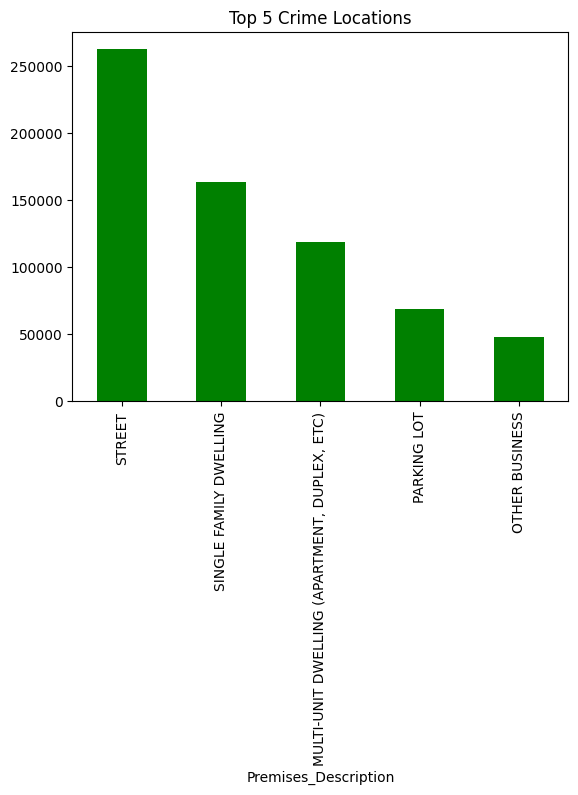

In [78]:
# Where do most crimes take place?
df['Premises_Description'].value_counts().head(5).plot(kind='bar', title='Top 5 Crime Locations',color='green')


In [79]:
#Data insisghts that we are getting from this ara as follows:
#Main Crime Area: Most crimes happen on Streets, indicating they are high-risk zones.
#Residences Matter:Multiunit Dwellings are also significant crime spots, likely due to burglaries or domestic issues.
#Lower Crime at Other Locations: Places like Parking Lots and Businesses have fewer incidents.
#Action Areas: These insights suggest that law enforcement should focus on streets and residential areas to help reduce crime.

In [ ]:


# Load the complete dataset
 
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

# Check data structure
df.info()

# Filter necessary columns for plotting
crime_data = df[['LAT', 'LON']].dropna()

# Set up the plot
plt.figure(figsize=(12, 8))
sns.kdeplot(
    x=crime_data['LON'], 
    y=crime_data['LAT'], 
    cmap="Reds", 
    fill=True, 
    thresh=0.05, 
    levels=100
)
plt.scatter(crime_data['LON'], crime_data['LAT'], c='black', s=5, alpha=0.3, label='Crime Reports')
plt.title('Crime Heatmap Across Los Angeles (Full Dataset)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show(block=True)



In [ ]:
# Overall Trend Analysis

#Crime Increase: Slight rise in crime from 2020-2022, peaked in 2023, then significantly declined by 2025.

#Vehicle Theft Trends: Highest reported crime, increasing until 2022, then decreasing.

#Vandalism: Increased until 2022, now declining.

#Central Area Focus: Highest crime concentration, needing targeted law enforcement.

#Victim Demographics: Most victims are young, with fewer older adults.

#Crime Seriousness: 60% of crimes are less serious, 40% more serious.

#Peak Crime Times: Highest rates between 5 PM and 7 PM.

#Gender Disparity: More male victims (500,000+) compared to female (400,000).

#High-Risk Areas: Streets are the main crime locations, followed by multiunit dwellings.

#Resource Allocation: Emphasizes the need for targeted crime prevention efforts in high-crime areas.